<a href="https://colab.research.google.com/github/sanjay-dutta/100-Days-of-Python/blob/main/letter_recognition_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Update the path to the dataset file in your Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/letter-recognition.csv'

In [5]:
ann_data = pd.read_csv("/content/drive/MyDrive/Dataset/letter-recognition.csv")
ann_data.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [6]:
# Extract features and labels
X = ann_data.iloc[:, 1:].values  # Assuming the features start from the second column
y = ann_data.iloc[:, 0].values

In [7]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(16,)),  # Update input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # Update the number of classes
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [13]:
# Train the model
ann_model = model.fit(X_train, y_train, epochs=2000, batch_size=8,
                      validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/2000
2000/2000 [==============================] - 3s 1ms/step - loss: 1.6867 - accuracy: 0.5138 - val_loss: 1.0289 - val_accuracy: 0.7045
Epoch 2/2000
2000/2000 [==============================] - 3s 1ms/step - loss: 0.9354 - accuracy: 0.7281 - val_loss: 0.8449 - val_accuracy: 0.7585
Epoch 3/2000
2000/2000 [==============================] - 3s 1ms/step - loss: 0.7796 - accuracy: 0.7709 - val_loss: 0.7559 - val_accuracy: 0.7602
Epoch 4/2000
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6836 - accuracy: 0.7965 - val_loss: 0.6224 - val_accuracy: 0.8087
Epoch 5/2000
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6094 - accuracy: 0.8162 - val_loss: 0.5672 - val_accuracy: 0.8240
Epoch 6/2000
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5557 - accuracy: 0.8267 - val_loss: 0.5326 - val_accuracy: 0.8407
Epoch 7/2000
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5071 - accuracy: 0.8426 - val_loss: 0.4650 -

In [14]:
def plot_metric(history, train_metric, val_metric, title):
    epochs = range(1, len(history.history[train_metric]) + 1)
    plt.plot(epochs, history.history[train_metric], 'g', label=f'Training {train_metric}')
    plt.plot(epochs, history.history[val_metric], 'b', label=f'Validation {val_metric}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

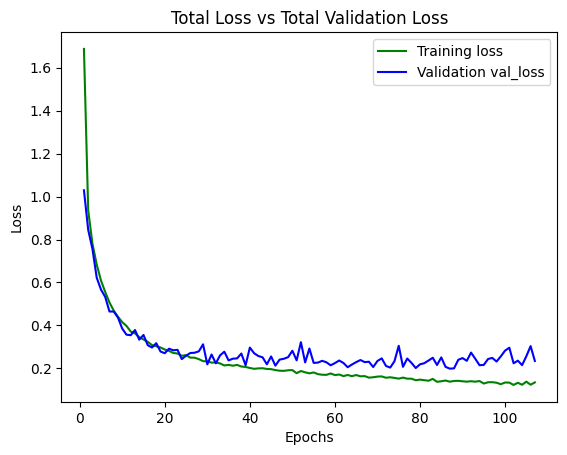

In [15]:
# Visualize the training and validation loss metrices.
plot_metric( ann_model, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

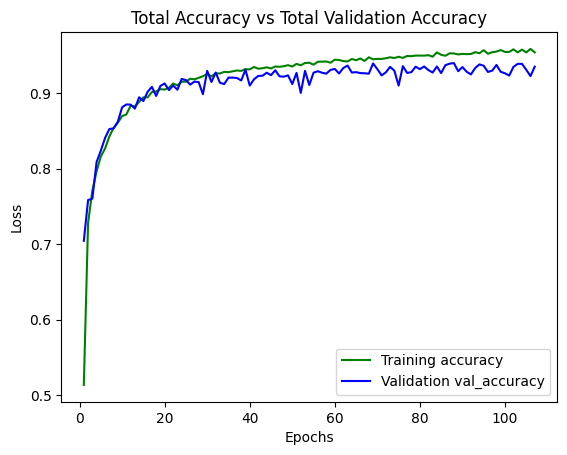

In [16]:
# Visualize the training and validation accuracy metrices.
plot_metric(ann_model, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [17]:
# One-hot encode the labels for y_test
# y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=12)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')



125/125 [==============================] - 0s 960us/step - loss: 0.1992 - accuracy: 0.9390
Test Loss: 0.1992
Test Accuracy: 0.9390


In [18]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

125/125 [==============================] - 0s 873us/step


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

125/125 [==============================] - 0s 1ms/step


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred is in one-hot encoded format, convert it to integer class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Now, you can compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)


[[156   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  5 134   0   0   0   0   0   2   1   0   2   0   0   1   0   0   0   3
    4   0   0   1   0   0   0   0]
 [  1   0 144   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  5   2   0 143   0   0   1   5   0   0   1   0   0   1   0   0   0   0
    1   1   0   0   0   0   1   0]
 [  1   2   0   0 145   0   0   0   0   0   0   1   0   0   0   0   1   1
    0   0   0   0   0   2   0   1]
 [  0   0   0   0   0 151   0   1   3   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  7   0   3   0   9   2 127   0   0   0   2   3   0   0   0   1   0   0
    0   0   0   0   1   0   0   0]
 [  3   2   0   2   0   0   0 129   0   0   1   0   0   4   0   1   0   4
    0   1   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0 140   8   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  1   0   0   0  

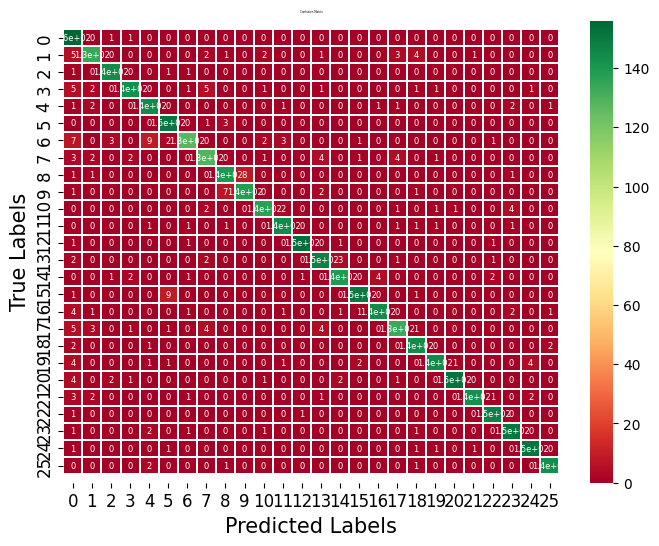

In [23]:
# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, cmap='RdYlGn', linewidths=0.1, annot_kws={'size': 6})

# Fix the heatmap cutoff issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Set axis labels and titles
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.set_ylabel('True Labels', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=2)

# Set tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the heatmap
plt.show()


In [24]:
# Implement 5-fold cross-validation for the test set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

test_losses = []
test_accuracies = []

for train_index, test_index in skf.split(X_test, y_test):
    X_test_fold, X_val_fold = X_test[train_index], X_test[test_index]
    y_test_fold, y_val_fold = y_test[train_index], y_test[test_index]

    # Evaluate the model on the current test fold
    loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Test Loss (Fold): {loss:.4f}')
    print(f'Test Accuracy (Fold): {accuracy:.4f}')

    test_losses.append(loss)
    test_accuracies.append(accuracy)

# Average test metrics over all folds
average_test_loss = np.mean(test_losses)
average_test_accuracy = np.mean(test_accuracies)

print(f'\nAverage Test Loss over 5 Folds: {average_test_loss:.4f}')
print(f'Average Test Accuracy over 5 Folds: {average_test_accuracy:.4f}')

Test Loss (Fold): 0.2029
Test Accuracy (Fold): 0.9391
Test Loss (Fold): 0.1896
Test Accuracy (Fold): 0.9394
Test Loss (Fold): 0.2023
Test Accuracy (Fold): 0.9372
Test Loss (Fold): 0.1917
Test Accuracy (Fold): 0.9409
Test Loss (Fold): 0.2092
Test Accuracy (Fold): 0.9384

Average Test Loss over 5 Folds: 0.1992
Average Test Accuracy over 5 Folds: 0.9390
